# DeepLense projects - Common Test 1 - Multi-Class Classification

## Imports and Configs

In [1]:
# Imports
from collections import Counter
from pathlib import Path

# Importing self-defined functions and classes from another notebook
from Modules.NbLoader import *

FUNC_CLASSES_PATH = Path.cwd() / "Modules" / "Functions-Classes.ipynb"
functions_classes = NotebookLoader(path=FUNC_CLASSES_PATH).load_module(
    "functions_classes"
)

from functions_classes import *

from joblib import dump, load

importing Jupyter notebook from /home2/nouduru.venkata/GSOC/NVR-ML4SCI-GSOC24/DeepLense Tests/Codes/Modules/Functions-Classes.ipynb


In [2]:
# Configs
LABEL_MAP = {"vort": 0, "sphere": 1, "no": 2}

# Save bools
SAVE_METRICS: bool = False
SAVE_MODELS: bool = False
SAVE_PLOTS: bool = False

# Data Configs
SCALE_OUTPUTS: bool = False
BATCH_SIZE: int = 256
SHUFFLE_LOADING: bool = True

# Training Configs
N_EPOCHS = 75

# Torch configs
torch.set_default_dtype(torch.float64)

## Data Loading and Exploration

In [3]:
# Defining relative paths
CWD = Path.cwd()
DATA_FOLDER = CWD.parent / "Datasets" / "ct1"
OUTPUTS = CWD.parent / "Outputs" / "ct1"

OUTPUTS.mkdir(parents=True, exist_ok=True)

In [4]:
# Sorting file paths into train and val files
ALL_FILES = list(DATA_FOLDER.rglob("*.npy"))
TRAIN_FILES = list(filter(lambda x: x.parents[1].name == "train", ALL_FILES))
VAL_FILES = list(filter(lambda x: x.parents[1].name == "val", ALL_FILES))

In [5]:
# Defining DataLoaders using custom dataset class
trainset = CT1Set(
    file_paths=TRAIN_FILES, label_map=LABEL_MAP, transform=None, target_transform=None
)
valset = CT1Set(
    file_paths=VAL_FILES, label_map=LABEL_MAP, transform=None, target_transform=None
)

trainloader = DataLoader(trainset, batch_size=BATCH_SIZE, shuffle=SHUFFLE_LOADING)
valloader = DataLoader(valset, batch_size=BATCH_SIZE, shuffle=SHUFFLE_LOADING)

In [6]:
# Data Statistics
classes = list(LABEL_MAP.keys())
train_names = list(map(lambda x: x.parent.name, TRAIN_FILES))
val_names = list(map(lambda x: x.parent.name, VAL_FILES))

train_counts = Counter(train_names)
val_counts = Counter(val_names)

print(
    "".join(["="] * 20) + " Dataset statistics for Common Test 1 " + "".join(["="] * 20)
)
print("Distribution of Train images:")
print(train_counts)
print("\n")
print("Distribution of Validation (Test) images:")
print(val_counts)

==================== Dataset statistics for Common Test 1 ====================
Distribution of Train images:
Counter({'vort': 10000, 'no': 10000, 'sphere': 10000})


Distribution of Validation (Test) images:
Counter({'vort': 2500, 'no': 2500, 'sphere': 2500})


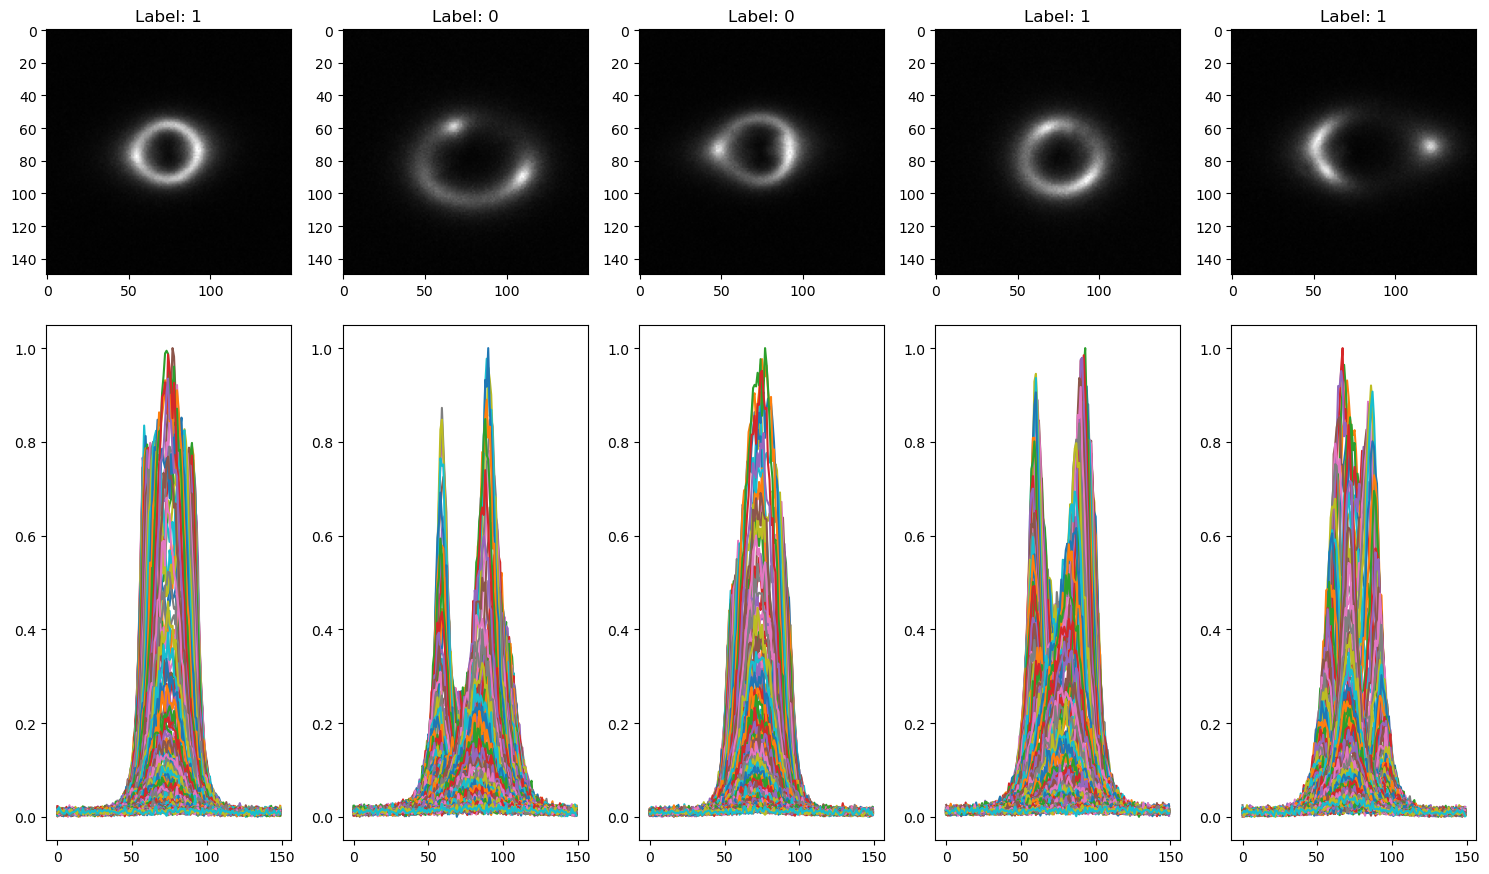

In [7]:
# Displaying random images from train data
random_plots(trainset)

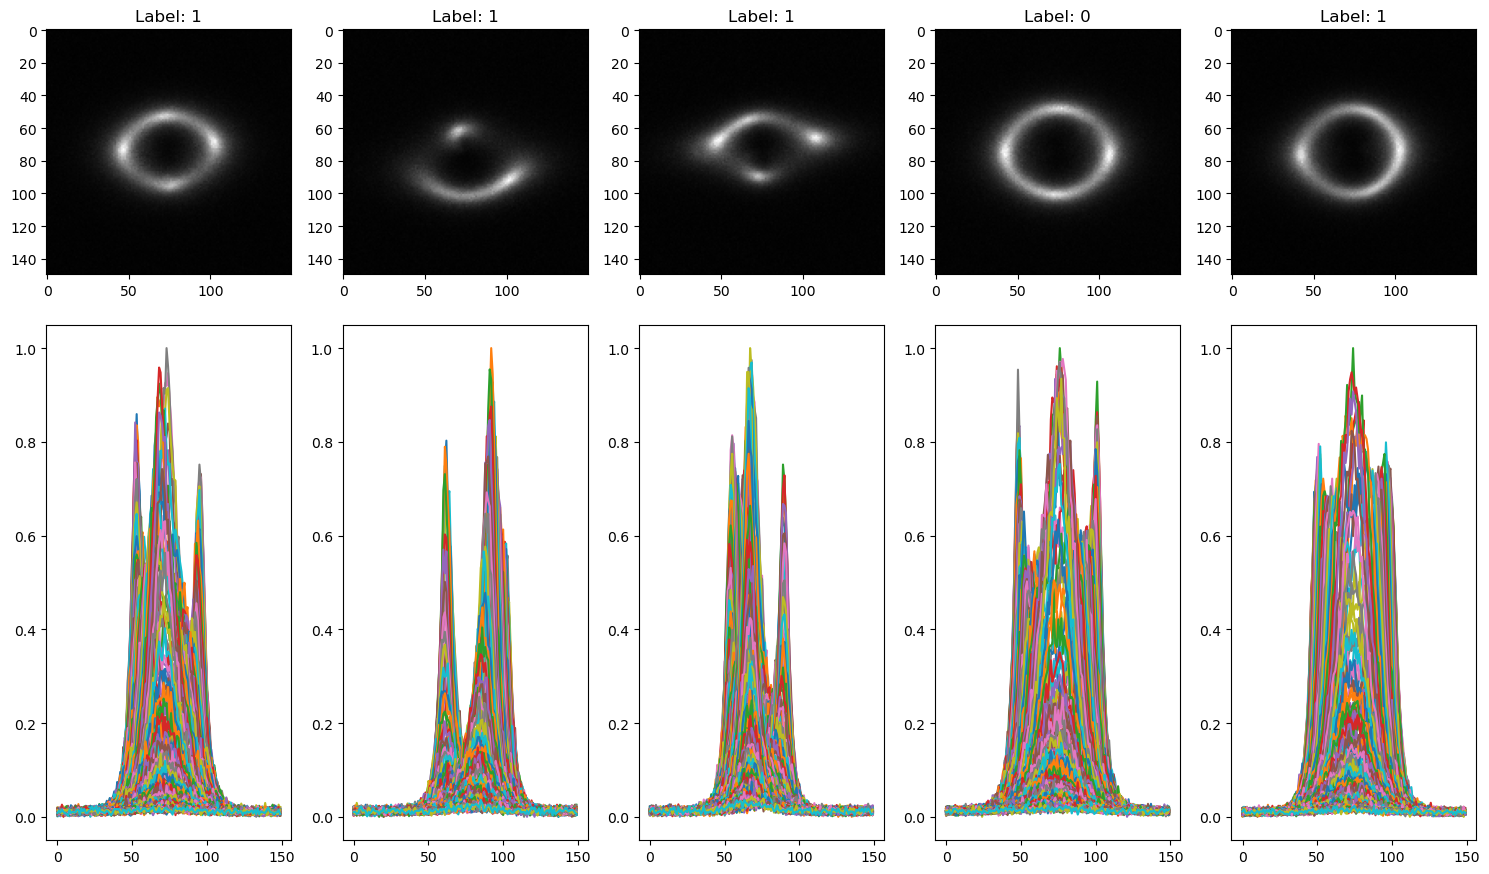

In [8]:
# Displaying random images from val data
random_plots(valset)

## Model Training and testing

In [9]:
# Model Class
class CNN1(nn.Module):
    def __init__(self):
        super().__init__()
        self.model = nn.Sequential(
            nn.Conv2d(1, 32, kernel_size=4, stride=2),  # 150
            nn.LeakyReLU(),
            nn.Conv2d(32, 64, kernel_size=4, stride=2),  #
            nn.LeakyReLU(),
            nn.Conv2d(64, 128, kernel_size=4, stride=2),
            nn.LeakyReLU(),
            nn.Conv2d(128, 256, kernel_size=4, stride=2),
            nn.LeakyReLU(),
            nn.Conv2d(256, 512, kernel_size=4, stride=2),
            nn.Flatten(),
            nn.Linear(2048, 512),
            nn.LeakyReLU(),
            nn.Linear(512, 128),
            nn.LeakyReLU(),
            nn.Linear(128, 32),
            nn.LeakyReLU(),
            nn.Linear(32, 8),
            nn.LeakyReLU(),
            nn.Linear(8, 3),
            # nn.Sigmoid(),
        )

    def forward(self, x):
        out = self.model(x)
        return out

In [10]:
# Training models
model = CNN1()
model_optim = optim(model)
criterion = nn.CrossEntropyLoss()

trained_model, train_loss, _ = modeltrainer(
    model,
    optimizer=model_optim,
    trainloader=trainloader,
    epochs=N_EPOCHS,
    criterion=criterion,
)

  0%|          | 0/118 [00:00<?, ?it/s]

Epoch finished in 00:11:29


  0%|          | 0/118 [00:00<?, ?it/s]

Epoch finished in 00:04:24


  0%|          | 0/118 [00:00<?, ?it/s]

Epoch finished in 00:04:29


  0%|          | 0/118 [00:00<?, ?it/s]

Epoch finished in 00:04:29


  0%|          | 0/118 [00:00<?, ?it/s]

Epoch finished in 00:04:29


  0%|          | 0/118 [00:00<?, ?it/s]

Epoch finished in 00:04:28


  0%|          | 0/118 [00:00<?, ?it/s]

Epoch finished in 00:04:28


  0%|          | 0/118 [00:00<?, ?it/s]

Epoch finished in 00:04:28


  0%|          | 0/118 [00:00<?, ?it/s]

Epoch finished in 00:04:29


  0%|          | 0/118 [00:00<?, ?it/s]

Epoch finished in 00:04:30


  0%|          | 0/118 [00:00<?, ?it/s]

Epoch finished in 00:04:30


  0%|          | 0/118 [00:00<?, ?it/s]

Epoch finished in 00:04:30


  0%|          | 0/118 [00:00<?, ?it/s]

Epoch finished in 00:04:30


  0%|          | 0/118 [00:00<?, ?it/s]

Epoch finished in 00:04:30


  0%|          | 0/118 [00:00<?, ?it/s]

Epoch finished in 00:04:30


  0%|          | 0/118 [00:00<?, ?it/s]

Epoch finished in 00:04:30


  0%|          | 0/118 [00:00<?, ?it/s]

Epoch finished in 00:04:30


  0%|          | 0/118 [00:00<?, ?it/s]

Epoch finished in 00:04:30


  0%|          | 0/118 [00:00<?, ?it/s]

Epoch finished in 00:04:28


  0%|          | 0/118 [00:00<?, ?it/s]

Epoch finished in 00:04:30


  0%|          | 0/118 [00:00<?, ?it/s]

Epoch finished in 00:04:30


  0%|          | 0/118 [00:00<?, ?it/s]

Epoch finished in 00:04:30


  0%|          | 0/118 [00:00<?, ?it/s]

Epoch finished in 00:04:30


  0%|          | 0/118 [00:00<?, ?it/s]

Epoch finished in 00:04:30


  0%|          | 0/118 [00:00<?, ?it/s]

Epoch finished in 00:04:30


  0%|          | 0/118 [00:00<?, ?it/s]

Epoch finished in 00:04:30


  0%|          | 0/118 [00:00<?, ?it/s]

Epoch finished in 00:04:30


  0%|          | 0/118 [00:00<?, ?it/s]

Epoch finished in 00:04:31


  0%|          | 0/118 [00:00<?, ?it/s]

Epoch finished in 00:04:30


  0%|          | 0/118 [00:00<?, ?it/s]

Epoch finished in 00:04:30


  0%|          | 0/118 [00:00<?, ?it/s]

Epoch finished in 00:04:30


  0%|          | 0/118 [00:00<?, ?it/s]

Epoch finished in 00:04:30


  0%|          | 0/118 [00:00<?, ?it/s]

Epoch finished in 00:04:30


  0%|          | 0/118 [00:00<?, ?it/s]

Epoch finished in 00:04:30


  0%|          | 0/118 [00:00<?, ?it/s]

Epoch finished in 00:04:30


  0%|          | 0/118 [00:00<?, ?it/s]

Epoch finished in 00:04:30


  0%|          | 0/118 [00:00<?, ?it/s]

Epoch finished in 00:04:30


  0%|          | 0/118 [00:00<?, ?it/s]

Epoch finished in 00:04:30


  0%|          | 0/118 [00:00<?, ?it/s]

Epoch finished in 00:04:31


  0%|          | 0/118 [00:00<?, ?it/s]

Epoch finished in 00:04:30


  0%|          | 0/118 [00:00<?, ?it/s]

Epoch finished in 00:04:30


  0%|          | 0/118 [00:00<?, ?it/s]

Epoch finished in 00:04:30


  0%|          | 0/118 [00:00<?, ?it/s]

Epoch finished in 00:04:30


  0%|          | 0/118 [00:00<?, ?it/s]

Epoch finished in 00:04:30


  0%|          | 0/118 [00:00<?, ?it/s]

Epoch finished in 00:04:30


  0%|          | 0/118 [00:00<?, ?it/s]

Epoch finished in 00:04:30


  0%|          | 0/118 [00:00<?, ?it/s]

Epoch finished in 00:04:30


  0%|          | 0/118 [00:00<?, ?it/s]

Epoch finished in 00:04:31


  0%|          | 0/118 [00:00<?, ?it/s]

Epoch finished in 00:04:30


  0%|          | 0/118 [00:00<?, ?it/s]

Epoch finished in 00:04:30


  0%|          | 0/118 [00:00<?, ?it/s]

Epoch finished in 00:04:30


  0%|          | 0/118 [00:00<?, ?it/s]

Epoch finished in 00:04:30


  0%|          | 0/118 [00:00<?, ?it/s]

Epoch finished in 00:04:30


  0%|          | 0/118 [00:00<?, ?it/s]

Epoch finished in 00:04:30


  0%|          | 0/118 [00:00<?, ?it/s]

Epoch finished in 00:04:31


  0%|          | 0/118 [00:00<?, ?it/s]

Epoch finished in 00:04:30


  0%|          | 0/118 [00:00<?, ?it/s]

Epoch finished in 00:04:28


  0%|          | 0/118 [00:00<?, ?it/s]

Epoch finished in 00:04:30


  0%|          | 0/118 [00:00<?, ?it/s]

Epoch finished in 00:04:30


  0%|          | 0/118 [00:00<?, ?it/s]

Epoch finished in 00:04:30


  0%|          | 0/118 [00:00<?, ?it/s]

Epoch finished in 00:04:30


  0%|          | 0/118 [00:00<?, ?it/s]

Epoch finished in 00:04:30


  0%|          | 0/118 [00:00<?, ?it/s]

Epoch finished in 00:04:30


  0%|          | 0/118 [00:00<?, ?it/s]

Epoch finished in 00:04:30


  0%|          | 0/118 [00:00<?, ?it/s]

Epoch finished in 00:04:30


  0%|          | 0/118 [00:00<?, ?it/s]

Epoch finished in 00:04:30


  0%|          | 0/118 [00:00<?, ?it/s]

Epoch finished in 00:04:31


  0%|          | 0/118 [00:00<?, ?it/s]

Epoch finished in 00:04:30


  0%|          | 0/118 [00:00<?, ?it/s]

Epoch finished in 00:04:30


  0%|          | 0/118 [00:00<?, ?it/s]

Epoch finished in 00:04:30


  0%|          | 0/118 [00:00<?, ?it/s]

Epoch finished in 00:04:30


  0%|          | 0/118 [00:00<?, ?it/s]

Epoch finished in 00:04:30


  0%|          | 0/118 [00:00<?, ?it/s]

Epoch finished in 00:04:30


  0%|          | 0/118 [00:00<?, ?it/s]

Epoch finished in 00:04:30


  0%|          | 0/118 [00:00<?, ?it/s]

Epoch finished in 00:04:30


In [11]:
dump(trained_model, "trained_cnn1_75ep.joblib")
dump(train_loss, "cnn1_trainloss_75ep.joblib")

['cnn1_trainloss_75ep.joblib']